<a href="https://colab.research.google.com/github/bwoody13/CNN-MNIST_CIFAR10-Classification/blob/main/train_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize Notebook
Make sure to select GPU runtime if you want to train on GPU

## Clone and Pull Git Repository

In [1]:
!git clone https://github.com/bwoody13/CNN-MNIST_CIFAR10-Classification.git
%cd CNN-MNIST_CIFAR10-Classification

Cloning into 'CNN-MNIST_CIFAR10-Classification'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 42 (delta 12), reused 39 (delta 12), pack-reused 0
Receiving objects: 100% (42/42), 17.45 MiB | 26.16 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/CNN-MNIST_CIFAR10-Classification


Pull anytime repo udpated and want to have new code here

In [15]:
!git pull origin main

remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 9 (delta 6), reused 9 (delta 6), pack-reused 0
Unpacking objects: 100% (9/9), 896 bytes | 448.00 KiB/s, done.
From https://github.com/bwoody13/CNN-MNIST_CIFAR10-Classification
 * branch            main       -> FETCH_HEAD
   293f11a..1339063  main       -> origin/main
Updating 293f11a..1339063
Fast-forward
 CIFAR10/cifar10_cnn.py | 2 +-
 MNIST/mnist_cnn.py     | 2 +-
 base_cnn.py            | 4 +---
 save_load.py           | 3 +++
 train_test.py          | 1 -
 5 files changed, 6 insertions(+), 6 deletions(-)


In [16]:
!pwd

/content/CNN-MNIST_CIFAR10-Classification


## Import Necessary Libraries

In [42]:
# External
import torch
from torchvision.datasets import MNIST, CIFAR10
from torchvision import transforms
from torchvision.transforms import ToTensor, Normalize
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import numpy as np
import matplotlib.pyplot as plt

# Internal
from MNIST.mnist_cnn import MNISTCNN
from CIFAR10.cifar10_cnn import CIFAR10CNN
# from base_cnn import BaseCNN
from train_test import train, test
from save_load import save_model, MNIST_type, CIFAR10_type

# MNIST Training

## Load and Prep Datasets for Training

In [5]:
data_mean = 0.1307
data_std = 0.3081
init_trans = transforms.Compose([
    ToTensor(),
    Normalize((data_mean,), (data_std,))
])
dataset = MNIST(root='data/', train=True, download=True, transform=init_trans)
test_ds = MNIST(root='data/', train=False, download=True, transform=init_trans)
val_size = int(0.1 * len(dataset))
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

100%|██████████| 9912422/9912422 [00:00<00:00, 117607970.46it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 70427728.97it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 142305220.20it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 6635502.88it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Visualize Data

torch.Size([32, 1, 28, 28])


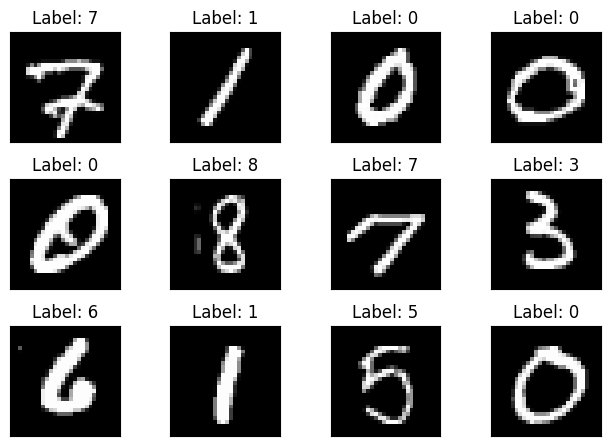

In [75]:
examples = enumerate(DataLoader(dataset, 32, shuffle=True))
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)
fig = plt.figure()
for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Label: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

plt.show()

## Initialize CNN Model

In [19]:
print(torch.cuda.is_available())
model = MNISTCNN(momentum=0.9, learning_rate=0.01, weight_decay=1e-5)
print(model.device)

False
cpu
cpu
cpu


## Create DataLoaders according to model

In [12]:
num_workers = 2 if 'cuda' in model.device.type else 0
pin_memory = True if 'cuda' in model.device.type else False

train_loader = DataLoader(train_dataset, model.batch_size, shuffle=True, num_workers=num_workers, pin_memory=pin_memory)
val_loader = DataLoader(val_dataset, model.batch_size, num_workers=num_workers, pin_memory=pin_memory)
test_loader = DataLoader(test_ds, model.batch_size, num_workers=num_workers, pin_memory=pin_memory)

## Train the Model

Epoch 1, Batch 100, Loss: 1.0353
Epoch 1, Batch 200, Loss: 0.2794
Epoch 1, Batch 300, Loss: 0.2007
Epoch 1, Batch 400, Loss: 0.1842
Epoch 1, Batch 500, Loss: 0.1528
Epoch 1, Batch 600, Loss: 0.1348
Epoch 1, Batch 700, Loss: 0.1112
Epoch 1, Batch 800, Loss: 0.1035
Validation Loss: 0.0742, Validation Accuracy: 97.67%
Epoch 2, Batch 100, Loss: 0.0959
Epoch 2, Batch 200, Loss: 0.0832
Epoch 2, Batch 300, Loss: 0.0730
Epoch 2, Batch 400, Loss: 0.0906
Epoch 2, Batch 500, Loss: 0.0918
Epoch 2, Batch 600, Loss: 0.0883
Epoch 2, Batch 700, Loss: 0.0838
Epoch 2, Batch 800, Loss: 0.0635
Validation Loss: 0.0516, Validation Accuracy: 98.32%
Epoch 3, Batch 100, Loss: 0.0616
Epoch 3, Batch 200, Loss: 0.0693
Epoch 3, Batch 300, Loss: 0.0645
Epoch 3, Batch 400, Loss: 0.0564
Epoch 3, Batch 500, Loss: 0.0628
Epoch 3, Batch 600, Loss: 0.0641
Epoch 3, Batch 700, Loss: 0.0528
Epoch 3, Batch 800, Loss: 0.0629
Validation Loss: 0.0468, Validation Accuracy: 98.57%
Epoch 4, Batch 100, Loss: 0.0537
Epoch 4, Batch 2

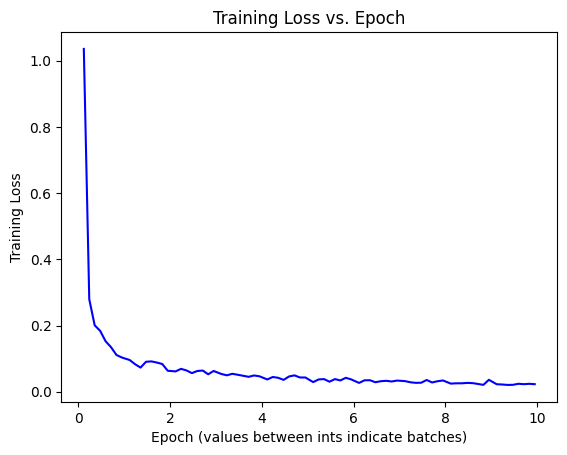

In [14]:
train(model, train_loader, val_loader)

## Test Model

In [39]:
# Train Dataset
test(model, train_loader)

TypeError: ignored

In [ ]:
# Test Dataset
test(model, test_loader)

## Save Model (Need to move to repo manually)

In [21]:
save_model(model, "first_trained_model", MNIST_type)

# CIFAR10 Training

## Load and Prep Datasets for Training

In [40]:
init_trans = transforms.Compose([
    ToTensor(),
    Normalize((0.5,0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = CIFAR10(root='data/', train=True, download=True, transform=init_trans)
test_ds = CIFAR10(root='data/', train=False, download=True, transform=init_trans)
val_size = int(0.1 * len(dataset))
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

100%|██████████| 170498071/170498071 [00:02<00:00, 76788619.46it/s]


Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


## Visualize Data

torch.Size([16, 3, 32, 32])


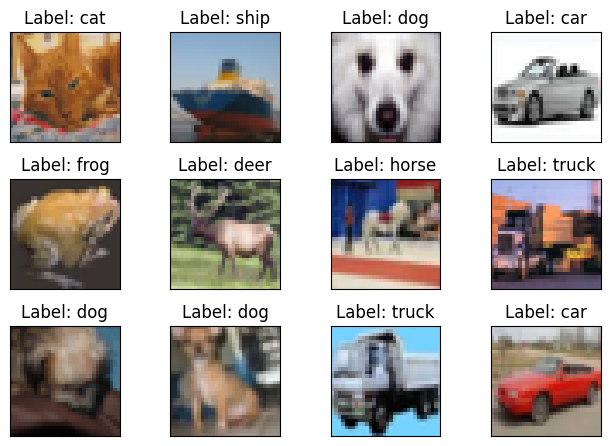

In [44]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
examples = enumerate(DataLoader(dataset, 16, shuffle=True))
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)
fig = plt.figure()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.tight_layout()
    # Unnoramlize image and transpose (inputs are channel, height, width)
    image = example_data[i] * 0.5 + 0.5
    image = np.transpose(image, (1, 2, 0))
    plt.imshow(image)
    plt.title(f"Label: {classes[example_targets[i]]}")
    plt.xticks([])
    plt.yticks([])

plt.show()

## Initialize CNN Model

In [47]:
print(torch.cuda.is_available())
model = CIFAR10CNN(momentum=0.9, learning_rate=0.1, epochs=1, weight_decay=1e-4, batch_size=128)
print(model.device)

False
cpu


## Create DataLoaders according to model

In [46]:
num_workers = 2 if 'cuda' in model.device.type else 0
pin_memory = True if 'cuda' in model.device.type else False

train_loader = DataLoader(train_dataset, model.batch_size, shuffle=True, num_workers=num_workers, pin_memory=pin_memory)
val_loader = DataLoader(val_dataset, model.batch_size, num_workers=num_workers, pin_memory=pin_memory)
test_loader = DataLoader(test_ds, model.batch_size, num_workers=num_workers, pin_memory=pin_memory)

## Train the Model

In [ ]:
train(model, train_loader, val_loader)

Epoch 1, Batch 100, Loss: 1.8554


## Test Model

In [ ]:
# Train Dataset
test(model, train_loader)

TypeError: ignored

In [ ]:
# Test Dataset
test(model, test_loader)

## Save Model (Need to move to repo manually)

In [ ]:
save_model(model, "first_trained_model", CIFAR10_type)